In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

Đọc dữ liệu từ các file

In [6]:
train_df = pd.read_csv('/train.csv')
valid_df = pd.read_csv('/valid.csv')
test_df = pd.read_csv('/test.csv')

print("Train:", train_df.shape)
print("Valid:", valid_df.shape)
print("Test:", test_df.shape)

Train: (31362, 17)
Valid: (4480, 17)
Test: (8962, 17)


Tiền xử lý dữ liệu

In [7]:
# Tạo cột Revenue (doanh thu)
train_df['Revenue'] = train_df['Quantity'] * train_df['UnitPrice'] * (1 - train_df['Discount'])
test_df['Revenue'] = test_df['Quantity'] * test_df['UnitPrice'] * (1 - test_df['Discount'])
valid_df['Revenue'] = valid_df['Quantity'] * valid_df['UnitPrice'] * (1 - valid_df['Discount'])

In [8]:
# Chọn các cột đặc trưng (features) và cột mục tiêu (target)
features = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']
target = 'Revenue'

In [9]:
# Chia dữ liệu thành X (đặc trưng) và y (mục tiêu)
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]
X_valid = valid_df[features]
y_valid = valid_df[target]

In [10]:
# Tiền xử lý: Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)

Xây dựng mô hình CNN

In [15]:
X_train_cnn = X_train_scaled.reshape(-1, len(features), 1, 1)
X_test_cnn = X_test_scaled.reshape(-1, len(features), 1, 1)
X_valid_cnn = X_valid_scaled.reshape(-1, len(features), 1, 1)

In [16]:
model = models.Sequential()
model.add(layers.Input(shape=(len(features), 1, 1)))                   # Input chuẩn
model.add(layers.Conv2D(64, (3, 1), activation='relu'))               # Quét theo chiều dọc
model.add(layers.MaxPooling2D((2, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [17]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Huấn luyện mô hình

In [18]:
history = model.fit(
    X_train_cnn, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid_cnn, y_valid),
    verbose=1
)

Epoch 1/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1070340.2500 - mae: 725.7282 - val_loss: 233700.4219 - val_mae: 366.3073
Epoch 2/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 199477.1719 - mae: 338.2028 - val_loss: 160584.2500 - val_mae: 299.7084
Epoch 3/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 149733.5000 - mae: 288.8414 - val_loss: 143853.0156 - val_mae: 284.6480
Epoch 4/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 140687.1719 - mae: 278.3630 - val_loss: 135721.2969 - val_mae: 276.9456
Epoch 5/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 133731.4375 - mae: 268.8211 - val_loss: 124628.5547 - val_mae: 259.0539
Epoch 6/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 125457.1484 - mae: 258.1533 - val_loss: 115638.7812 - val_mae: 247.0842
Epoch 7/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 116569.2188 - mae: 245.9131 - val_loss: 107520.8828 - val_mae: 235.2444
Epoch 8/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 107132.0000 - m

Đánh giá mô hình bằng các độ đo

In [19]:
y_pred = model.predict(X_test_cnn).flatten()
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MSE: 1494.65
MAE: 27.42
R² Score: 1.00


Trực quan đồ thị

So sánh doanh thu thực tế và dự đoán theo ngày:
Ngày 2024-07-14: Thực tế = 5555.79, Dự đoán = 5614.22
Ngày 2024-07-15: Thực tế = 17284.46, Dự đoán = 17572.30
Ngày 2024-07-16: Thực tế = 17465.11, Dự đoán = 18021.95
Ngày 2024-07-17: Thực tế = 18793.60, Dự đoán = 18841.08
Ngày 2024-07-18: Thực tế = 17826.91, Dự đoán = 17891.06
Ngày 2024-07-19: Thực tế = 21833.84, Dự đoán = 22001.52
Ngày 2024-07-20: Thực tế = 22494.09, Dự đoán = 22801.31
Ngày 2024-07-21: Thực tế = 26006.19, Dự đoán = 26199.35
Ngày 2024-07-22: Thực tế = 16874.65, Dự đoán = 16979.77
Ngày 2024-07-23: Thực tế = 33938.36, Dự đoán = 34081.68
Ngày 2024-07-24: Thực tế = 23208.85, Dự đoán = 23281.92
Ngày 2024-07-25: Thực tế = 21291.44, Dự đoán = 21386.29
Ngày 2024-07-26: Thực tế = 18288.27, Dự đoán = 18539.50
Ngày 2024-07-27: Thực tế = 21034.51, Dự đoán = 21395.10
Ngày 2024-07-28: Thực tế = 26938.66, Dự đoán = 26954.51
Ngày 2024-07-29: Thực tế = 14368.38, Dự đoán = 14514.86
Ngày 2024-07-30: Thực tế = 15327.10, Dự đoán = 15635.69
Ng

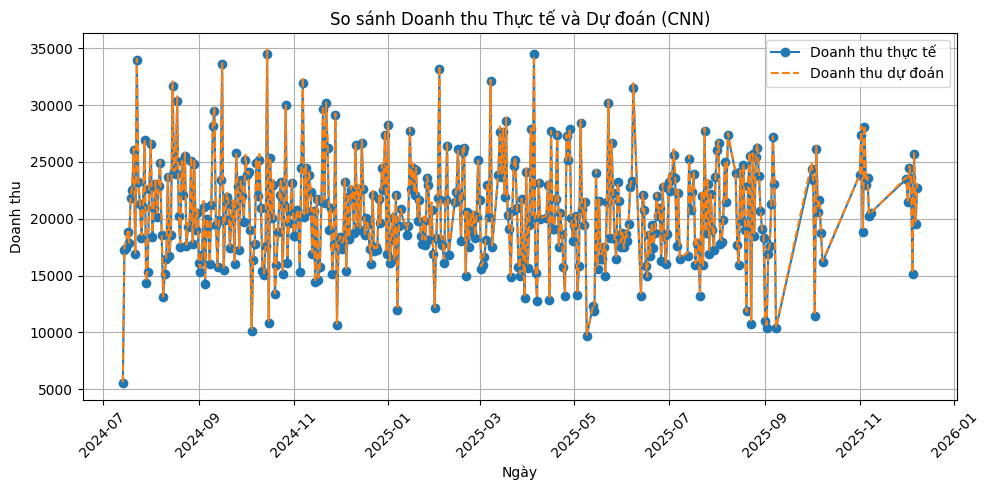

In [26]:
if 'InvoiceDate' in test_df.columns:
    test_df['InvoiceDate'] = pd.to_datetime(test_df['InvoiceDate'])

# Dự đoán doanh thu từ mô hình
test_df['PredictedRevenue'] = y_pred

# Nhóm dữ liệu theo ngày
daily_sales = test_df.groupby(test_df['InvoiceDate'].dt.date).agg({'Revenue': 'sum', 'PredictedRevenue': 'sum'}).reset_index()

# In ra doanh thu thực tế và dự đoán theo ngày
print("So sánh doanh thu thực tế và dự đoán theo ngày:")
for idx, row in daily_sales.iterrows():
    print(f"Ngày {row['InvoiceDate']}: Thực tế = {row['Revenue']:.2f}, Dự đoán = {row['PredictedRevenue']:.2f}")

# Vẽ đồ thị với x-label là ngày
plt.figure(figsize=(10, 5))
plt.plot(daily_sales['InvoiceDate'], daily_sales['Revenue'], label='Doanh thu thực tế', marker='o')
plt.plot(daily_sales['InvoiceDate'], daily_sales['PredictedRevenue'], label='Doanh thu dự đoán', linestyle='--')
plt.title("So sánh Doanh thu Thực tế và Dự đoán (CNN)")
plt.xlabel("Ngày")
plt.ylabel("Doanh thu")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
